In [1]:
import numpy as np
import tensorflow as tf
np.random.seed(0)
tf.random.set_seed(0)

In [2]:
from sklearn import datasets
raw_wine = datasets.load_wine()

In [3]:
X = raw_wine.data
y = raw_wine.target

In [6]:
print(X.shape) #피처 13개
print(set(y)) #분류 문제, 3개의 클래스로

(178, 13)
{0, 1, 2}


In [8]:
#타깃 데이터 원-핫 인코딩
from tensorflow.keras.utils import to_categorical
y_hot = to_categorical(y)
print(y_hot)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

In [9]:
from sklearn.model_selection import train_test_split
X_tn,X_te,y_tn,y_te = train_test_split(X,y_hot,random_state=0)

In [12]:
#신경망 생성
from tensorflow.keras.models import Sequential         #신경망 생성시 선언
from tensorflow.keras.layers import Dense              #신경망 층 추가
from tensorflow.keras.layers import BatchNormalization #배치 정규화
from tensorflow.keras.layers import Activation         #활성화 함수

n_feat = X_tn.shape[1] #신경망에 사용되는 피처 개수. 아까 13
n_class = len(set(y))  #클래스 개수. 아까 3개
epo = 30               #학습 횟수 30번
 
model = Sequential()                                   #초기 모델 생성
model.add(Dense(20,input_dim=n_feat))                  #입력층. 아웃풋 차원 20, 피처 13개
model.add(BatchNormalization())                        #배치 정규화
model.add(Activation('relu'))                          #활성화 함수 relu
model.add(Dense(n_class))                              #최종 아웃풋 층. 최종 차원 3 (0,1,2)
model.add(Activation('softmax'))                       #보통 최종 아웃풋은 소프트맥스

In [14]:
#신경망 구조
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 20)                280       
                                                                 
 batch_normalization_1 (Batc  (None, 20)               80        
 hNormalization)                                                 
                                                                 
 activation_2 (Activation)   (None, 20)                0         
                                                                 
 dense_3 (Dense)             (None, 3)                 63        
                                                                 
 activation_3 (Activation)   (None, 3)                 0         
                                                                 
Total params: 423
Trainable params: 383
Non-trainable params: 40
_______________________________________________________

In [15]:
#모형 컴파일
model.compile(loss='categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [16]:
#신경망 학습
hist = model.fit(X_tn,y_tn,epochs=epo,batch_size=5)

Epoch 1/30


2024-01-24 14:14:47.106556: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


27/27 [==============================] - 0s 515us/step - loss: 2.1165 - accuracy: 0.0902
Epoch 2/30
27/27 [==============================] - 0s 514us/step - loss: 1.7277 - accuracy: 0.0977
Epoch 3/30
27/27 [==============================] - 0s 455us/step - loss: 1.4156 - accuracy: 0.2105
Epoch 4/30
27/27 [==============================] - 0s 427us/step - loss: 1.1824 - accuracy: 0.3835
Epoch 5/30
27/27 [==============================] - 0s 463us/step - loss: 0.9637 - accuracy: 0.6015
Epoch 6/30
27/27 [==============================] - 0s 447us/step - loss: 0.8798 - accuracy: 0.6391
Epoch 7/30
27/27 [==============================] - 0s 435us/step - loss: 0.8938 - accuracy: 0.5940
Epoch 8/30
27/27 [==============================] - 0s 426us/step - loss: 0.8321 - accuracy: 0.6316
Epoch 9/30
27/27 [==============================] - 0s 430us/step - loss: 0.8414 - accuracy: 0.6015
Epoch 10/30
27/27 [==============================] - 0s 451us/step - loss: 0.8128 - accuracy: 0.5789
Epoch 11/3

In [17]:
print(model.evaluate(X_tn,y_tn)[1])
print(model.evaluate(X_te,y_te)[1])

5/5 [==============================] - 0s 627us/step - loss: 0.4503 - accuracy: 0.8647
0.8646616339683533
2/2 [==============================] - 0s 1ms/step - loss: 0.3303 - accuracy: 0.8889
0.8888888955116272


In [19]:
#정확도 및 손실 정도 시각화
import numpy as np
epoch = np.arange(1,epo+1) #시각화의 epoch ->전체 트레이닝 세트의 학습 반복 수
print(epoch)
accuracy = hist.history['accuracy'] #정확도. 점점 오른다
print(accuracy)
loss=hist.history['loss'] #손실 정도. 점점 낮아진다.
print(loss)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
[0.09022556245326996, 0.09774436056613922, 0.21052631735801697, 0.3834586441516876, 0.6015037298202515, 0.6390977501869202, 0.5939849615097046, 0.6315789222717285, 0.6015037298202515, 0.5789473652839661, 0.6541353464126587, 0.6541353464126587, 0.6842105388641357, 0.6917293071746826, 0.7443609237670898, 0.7969924807548523, 0.7819548845291138, 0.7368420958518982, 0.7443609237670898, 0.7819548845291138, 0.7894737124443054, 0.7518796920776367, 0.8496240377426147, 0.7669172883033752, 0.8195488452911377, 0.8421052694320679, 0.8571428656578064, 0.7744361162185669, 0.8270676732063293, 0.8496240377426147]
[2.1164824962615967, 1.7276784181594849, 1.4155781269073486, 1.1824314594268799, 0.963664710521698, 0.8798118829727173, 0.8938149213790894, 0.8321142196655273, 0.8413624167442322, 0.8127676248550415, 0.7569577693939209, 0.7503243088722229, 0.7668824791908264, 0.7495436072349548, 0.6375086903572083, 0.5

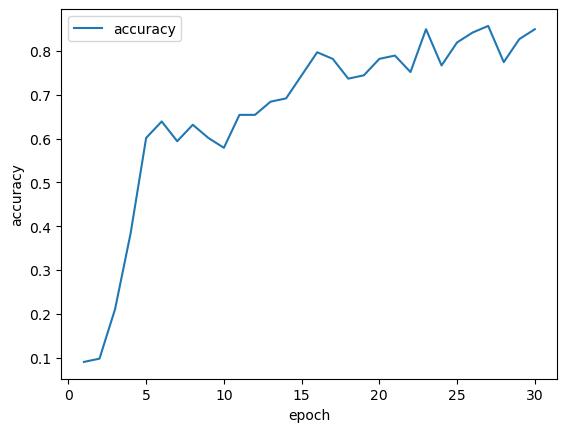

In [23]:
import matplotlib.pyplot as plt
plt.plot(epoch,accuracy,label='accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

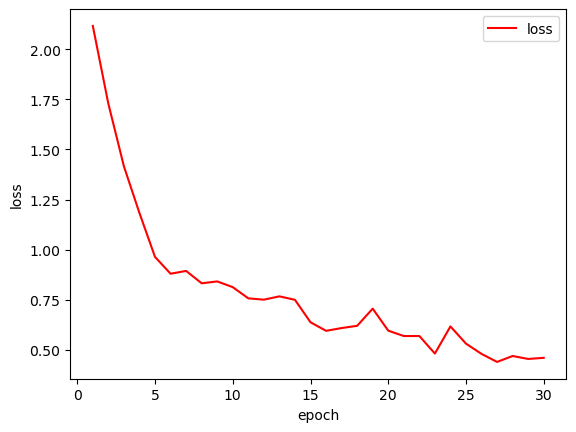

In [24]:
import matplotlib.pyplot as plt
plt.plot(epoch,loss,'r',label='loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()